# $\kappa_\lambda$ = 10

**Goal:** Evaluate the performance of the $\kappa_\lambda$ = 10 signal and the dedicated training.

In [1]:
import pandas as pd
import numpy as np
import itertools
from itertools import combinations
from tqdm import tqdm
from glob import glob
import dask.dataframe as dd

import matplotlib.pyplot as plt
from matplotlib import gridspec

import json
import time
import h5py
import uproot

import os
os.sys.path.append('../eda_tools')
from plot_helper import massplane

%load_ext autoreload
%autoreload 2

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.unsupervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [53]:
len(glob(f'{in_dir}/df_period?_*_kappa_10_*_2b.h5'))

706

In [58]:
glob(f'{in_dir}/df_period?_*_kappa_10_*_2b.h5')

['../data/data16_PFlow-FEB20-5jets/files/df_periodF_000023_kappa_10_even_2b.h5',
 '../data/data16_PFlow-FEB20-5jets/files/df_periodF_000028_kappa_10_even_2b.h5',
 '../data/data16_PFlow-FEB20-5jets/files/df_periodK_000003_kappa_10_even_2b.h5',
 '../data/data16_PFlow-FEB20-5jets/files/df_periodI_000039_kappa_10_even_2b.h5',
 '../data/data16_PFlow-FEB20-5jets/files/df_periodL_000029_kappa_10_even_2b.h5',
 '../data/data16_PFlow-FEB20-5jets/files/df_periodG_000035_kappa_10_even_2b.h5',
 '../data/data16_PFlow-FEB20-5jets/files/df_periodD_000031_kappa_10_even_2b.h5',
 '../data/data16_PFlow-FEB20-5jets/files/df_periodC_000017_kappa_10_odd_2b.h5',
 '../data/data16_PFlow-FEB20-5jets/files/df_periodI_000019_kappa_10_odd_2b.h5',
 '../data/data16_PFlow-FEB20-5jets/files/df_periodB_000017_kappa_10_even_2b.h5',
 '../data/data16_PFlow-FEB20-5jets/files/df_periodB_000023_kappa_10_even_2b.h5',
 '../data/data16_PFlow-FEB20-5jets/files/df_periodA_000014_kappa_10_even_2b.h5',
 '../data/data16_PFlow-FEB20-5

In [54]:
len(glob(f'{in_dir}/df_period?_*_kappa_10_*_3b.h5'))

706

**Step 1:** Draw the "Lucas plot" for the massplane

In [5]:
in_dir = '../data/data16_PFlow-FEB20-5jets/files'
#dat_2b = dd.read_hdf(f'{in_dir}/df_period?_*_kappa_10_*_2b.h5', 'df', mode='r')
dat_3b = dd.read_hdf(f'{in_dir}/df_period?_*_kappa_10_*_3b.h5', 'df', mode='r')

SR center: (120.0,110.0) GeV


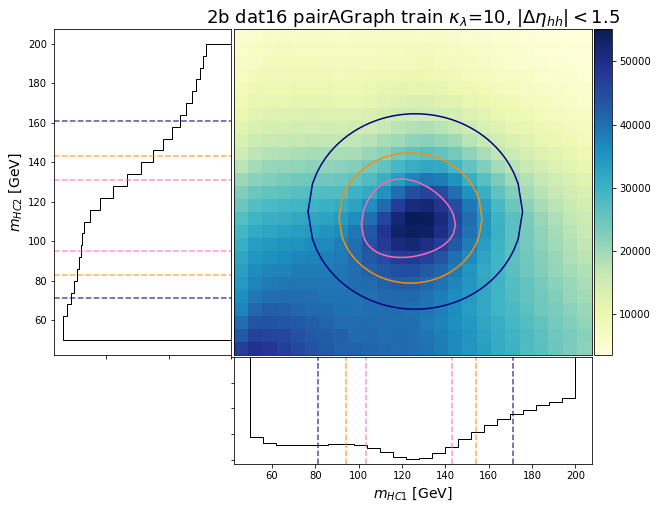

NameError: name 'kwarg' is not defined

In [67]:
kwargs = {'figsize': (10, 8),
           'bins' : (25,25),
           'xrange': (50, 200),
           'yrange': (50, 200),
           'xhisttype': 'step',
           'yhisttype': 'step',
           'cmap': 'YlGnBu',
           'title': '2b dat16 pairAGraph train $\kappa_\lambda$=10, $|\Delta \eta_{hh} | < 1.5$',
           'filename':f'figures/data16_PFlow-FEB20-5jets/kappa_10/massplane_2b_deta_hh.pdf',
           'xlabel': '$m_{HC1}$ [GeV]',
           'ylabel': '$m_{HC2}$ [GeV]',
           'axis_hist_on': True,
           'hist_color': 'black',
           'alpha': 0.7,
           'save': True,
           'show': True,
          }

df_2b = dat_2b.loc[(dat_2b.eta_h1-dat_2b.eta_h2).abs()<1.5, ['m_h1','m_h2','X_wt']].compute()

kwargs['weights'] = np.ones(len(df_2b))
fig = massplane(df_2b,**kwargs)


SR center: (120.0,110.0) GeV


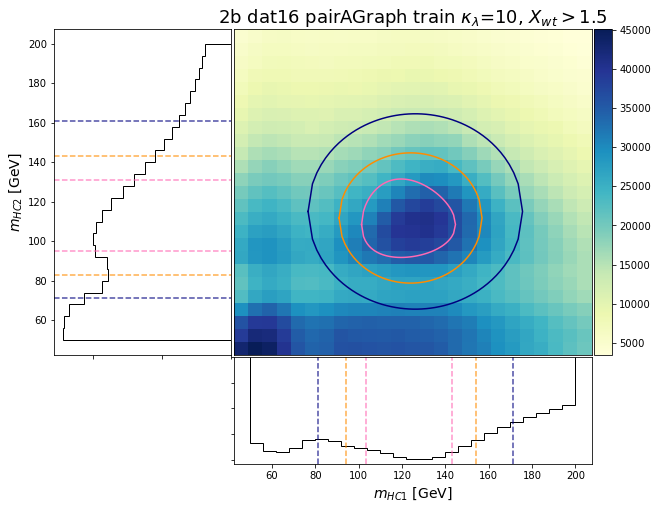

In [68]:
mask = (df_2b.X_wt > 1.5)
kwargs['weights'] = np.ones(np.sum(mask))
kwargs['title'] = '2b dat16 pairAGraph train $\kappa_\lambda$=10, $X_{wt} > 1.5$'
kwargs['filename'] = 'figures/data16_PFlow-FEB20-5jets/kappa_10/massplane_2b_Xwt.pdf'
fig = massplane(df_2b[mask],**kwargs)

And now for 3b and 4b!

In [8]:
dat_3b.columns

Index(['run_number', 'event_number', 'mc_sf', 'ntag', 'njets',
       'kinematic_region', 'm_hh', 'pt_hh', 'X_wt', 'm_hh_cor', 'pT_h1',
       'eta_h1', 'phi_h1', 'm_h1', 'dRjj_h1', 'dPhi_h1', 'pT_h2', 'eta_h2',
       'phi_h2', 'm_h2', 'dRjj_h2', 'dPhi_h2', 'pT_2', 'pT_4', 'eta_i',
       'dRjj_1', 'dRjj_2', 'cosThetaStar', 'cosTheta1', 'cosTheta2', 'Phi',
       'Phi1', 'ml_j0_Db', 'ml_j1_Db', 'ml_j2_Db', 'ml_j3_Db', 'ml_j4_Db',
       'idx_HC0_j0', 'idx_HC0_j1', 'idx_HC1_j0', 'idx_HC1_j1', 'HT', 'MDR',
       'MDpT', 'max_prob', 'abs_deta_hh'],
      dtype='object')

SR center: (120.0,110.0) GeV


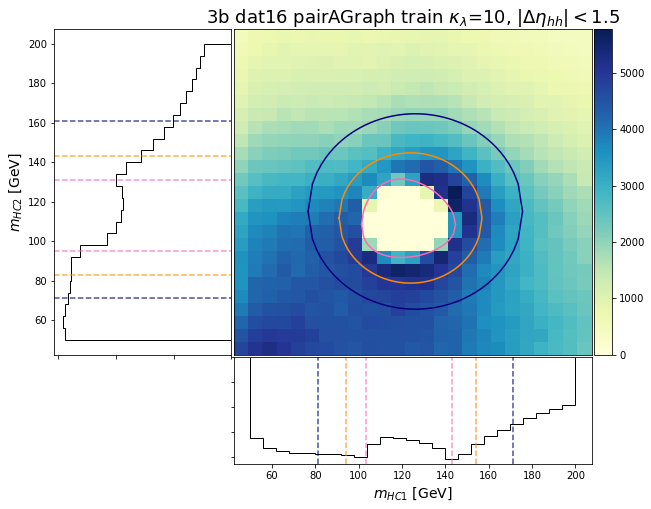

SR center: (120.0,110.0) GeV


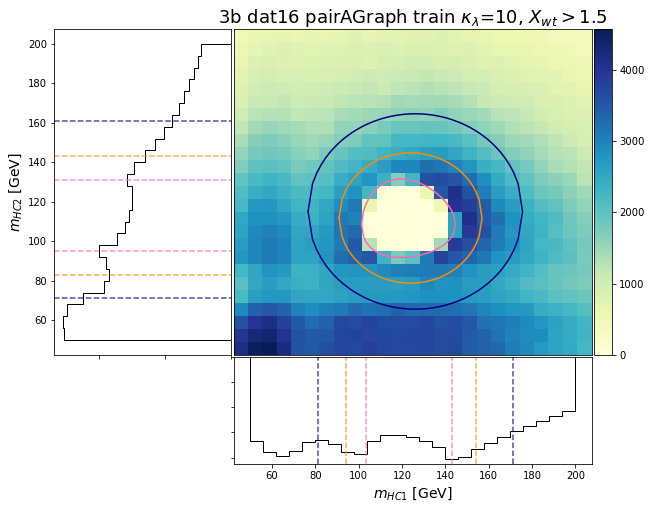

In [12]:
kwargs = {'figsize': (10, 8),
           'bins' : (25,25),
           'xrange': (50, 200),
           'yrange': (50, 200),
           'xhisttype': 'step',
           'yhisttype': 'step',
           'cmap': 'YlGnBu',
           'title': '3b dat16 pairAGraph train $\kappa_\lambda$=10, $|\Delta \eta_{hh} | < 1.5$',
           'filename':f'figures/data16_PFlow-FEB20-5jets/kappa_10/massplane_3b_deta_hh.pdf',
           'xlabel': '$m_{HC1}$ [GeV]',
           'ylabel': '$m_{HC2}$ [GeV]',
           'axis_hist_on': True,
           'hist_color': 'black',
           'alpha': 0.7,
           'save': True,
           'show': True,
          }
cols = ['m_h1','m_h2','X_wt','dRjj_h1','dRjj_h2','m_hh','dRjj_1','dRjj_2','MDR','ntag']
df_3b = dat_3b.loc[((dat_3b.eta_h1-dat_3b.eta_h2).abs()<1.5)&(df_3b.kinematic_region != 0), cols].compute()

mask = (df_3b.ntag==3)
kwargs['weights'] = np.ones(np.sum(mask))
fig = massplane(df_3b[mask],**kwargs)

mask = mask& (df_3b.X_wt > 1.5)
kwargs['weights'] = np.ones(np.sum(mask))
kwargs['title'] = '3b dat16 pairAGraph train $\kappa_\lambda$=10, $X_{wt} > 1.5$'
kwargs['filename'] = 'figures/data16_PFlow-FEB20-5jets/kappa_10/massplane_3b_Xwt.pdf'
fig = massplane(df_3b[mask],**kwargs)

SR center: (120.0,110.0) GeV


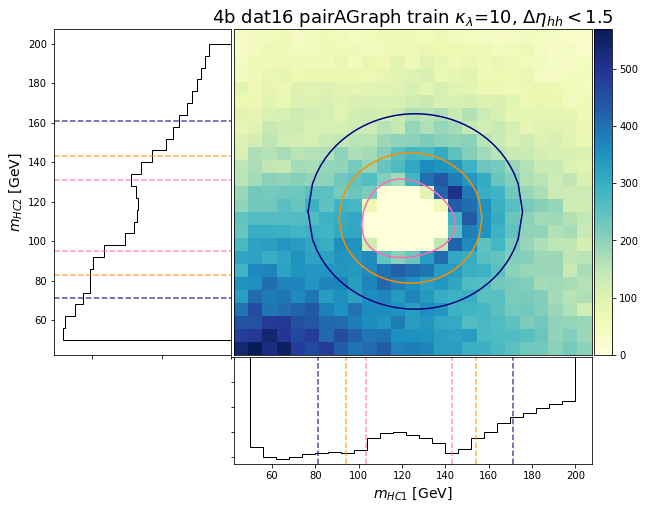

SR center: (120.0,110.0) GeV


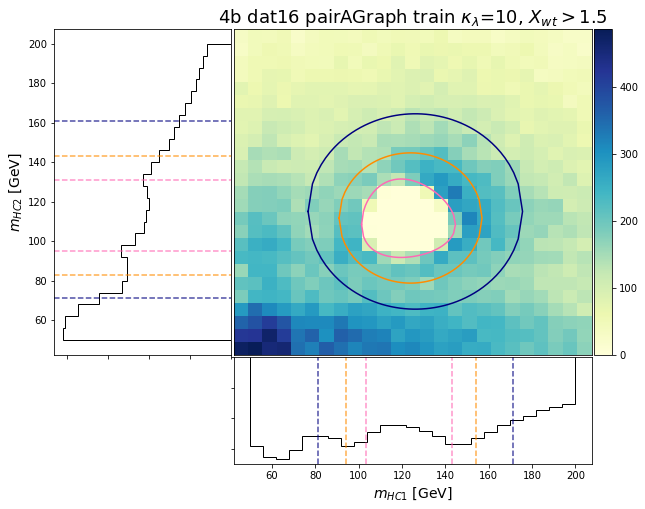

In [15]:
mask = (df_3b.kinematic_region != 0) & (df_3b.ntag>=4)
kwargs['weights'] = np.ones(np.sum(mask))
kwargs['title'] = '4b dat16 pairAGraph train $\kappa_\lambda$=10, $\Delta \eta_{hh}<1.5$'
kwargs['filename'] = 'figures/data16_PFlow-FEB20-5jets/kappa_10/massplane_4b_deta_hh.pdf'
fig = massplane(df_3b[mask],**kwargs)

mask = mask& (df_3b.X_wt > 1.5)
kwargs['weights'] = np.ones(np.sum(mask))
kwargs['title'] = '4b dat16 pairAGraph train $\kappa_\lambda$=10, $X_{wt} > 1.5$'
kwargs['filename'] = 'figures/data16_PFlow-FEB20-5jets/kappa_10/massplane_4b_Xwt.pdf'
fig = massplane(df_3b[mask],**kwargs)

**Step 2:** Compare signal efficiencies(?)

In [13]:
k10_dir = '../data/k10_mc16a_PFlow-APR2020-5jets'

k_k10 = dd.read_hdf(f'{k10_dir}/df_kappa_10_*_3b.h5','df',mode='r').compute()
k_sm  = dd.read_hdf(f'{k10_dir}/df_SM_2b_*_3b.h5','df',mode='r').compute()

In [5]:
sm_dir = '../data/SMNR_mc16a_PFlow-APR2020-5jets'

#s_k10 = dd.read_hdf(f'{sm_dir}/df_kappa_10_*_3b.h5','df',mode='r')
s_sm  = dd.read_hdf(f'{sm_dir}/df_SM_2b_*_3b.h5','df',mode='r').compute()

In [6]:
SR_k10 = (k_k10.cut_deta_hh)&(k_k10.cut_Xwt)&(k_k10.ntag >=4)&(k_k10.kinematic_region==0)
mhh_k10 = k_k10.loc[SR_k10, 'm_hh']
sf_k10  = k_k10.loc[SR_k10, 'mc_sf']

In [7]:
SR_sm = (k_sm.cut_deta_hh)&(k_sm.cut_Xwt)&(k_sm.ntag >=4)&(k_sm.kinematic_region==0)
mhh_sm = k_sm.loc[SR_sm, 'm_hh']
sf_sm  = k_sm.loc[SR_sm, 'mc_sf']

In [8]:
edges = np.array([150, 250, 262, 275, 288, 302, 317, 332, 348, 365, 383, 402, 422, 443, 465, 488, 512, 
                  537, 563, 591, 620, 651, 683, 717, 752, 789, 828, 869, 912, 957,1004, 1054, 1106, 1161, 
                  1219, 1279, 1342, 1409, 1479, 1552, 1629, 1710, 1795, 1884, 1978, 2076])

In [9]:
text = "$\mathbf{ATLAS}$ Simulation Internal\n"
text += "mc16a APR2020 MNT prod, DL1r 77% WP\n"
text += "pairAGraph $|\Delta \eta_{hh}| < 1.5$, $X_{wt}>1.5$"

In [29]:
figDir = 'figures/k10_mc16a_PFlow-APR2020-5jets/kappa_10'

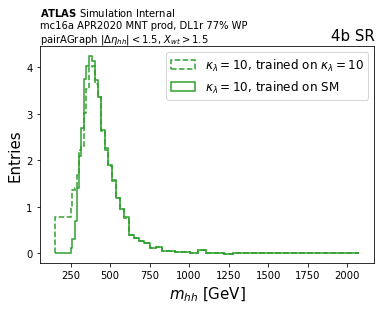

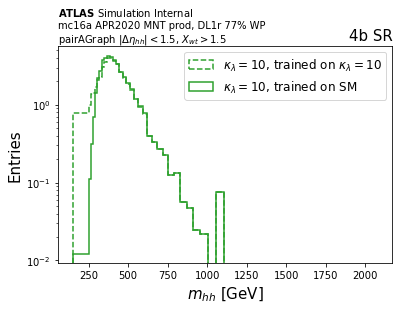

In [30]:
for log,logTag in zip([False,True],['','_log']):

    plt.hist(mhh_k10,edges,histtype='step',color='C2',ls='--',lw=1.5,weights=sf_k10,
             label='$\kappa_\lambda = 10$, trained on $\kappa_\lambda = 10$',log=log)
    plt.hist(mhh_sm,edges,histtype='step',color='C2',lw=1.5,weights=sf_sm,
             label='$\kappa_\lambda = 10$, trained on SM',log=log)

    plt.xlabel('$m_{hh}$ [GeV]',fontsize=15)
    plt.ylabel('Entries',fontsize=15)
    plt.legend(fontsize=12)
    plt.title('4b SR',fontsize=15,loc='right')

    ax = plt.gca()
    plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

    plt.savefig(f'{figDir}/m_hh_4b_SR_sm_k10_tr{logTag}.pdf',bbox_inches='tight')
    plt.show()

**Next:** Let's make massplanes ane (maybe) save where the center of the SR should be?

SR center: (120.0,110.0) GeV


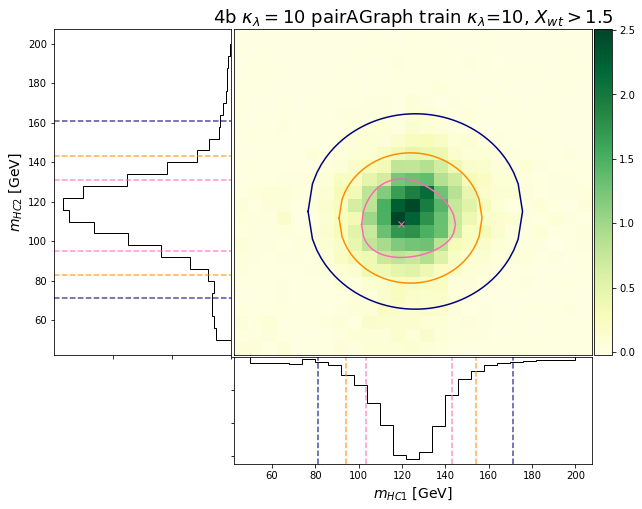

m_h1 =  133.79663587785197 m_h2 =  115.57559690199679
SR center: (120.0,110.0) GeV


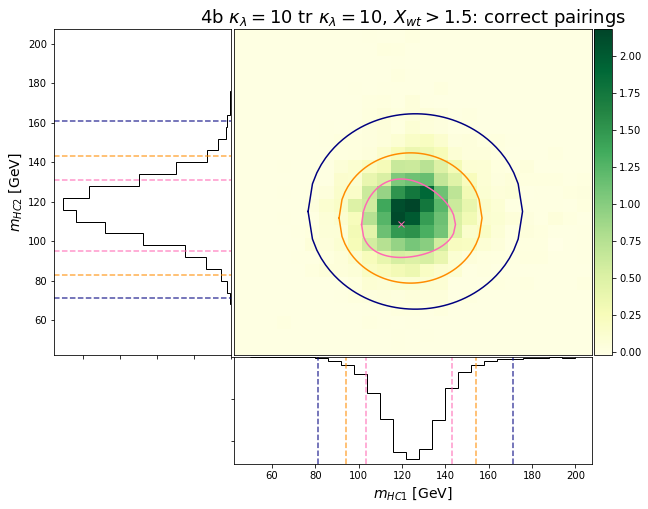

m_h1 =  125.60284939740465 m_h2 =  116.9468937066936
SR center: (120.0,110.0) GeV


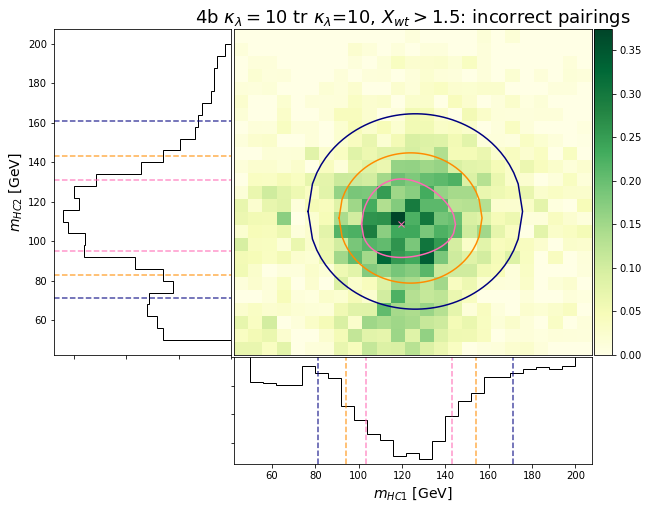

m_h1 =  146.37874700973367 m_h2 =  113.46987827817594


In [51]:
kwargs = {'figsize': (10, 8),
           'bins' : (25,25),
           'xrange': (50, 200),
           'yrange': (50, 200),
           'xhisttype': 'step',
           'yhisttype': 'step',
           'cmap': 'YlGn',
           'title': '4b $\kappa_\lambda=10$ pairAGraph train $\kappa_\lambda$=10, $X_{wt} > 1.5$',
           'filename':f'{figDir}/massplane_4b_postXwt.pdf',
           'xlabel': '$m_{HC1}$ [GeV]',
           'ylabel': '$m_{HC2}$ [GeV]',
           'axis_hist_on': True,
           'hist_color': 'black',
           'alpha': 0.7,
           'save': True,
           'show': True,
           'plot_center': True
          }

mask = (k_k10.cut_deta_hh)&(k_k10.cut_Xwt)&(k_k10.ntag >=4)
kwargs['weights'] = k_k10.loc[mask,'mc_sf']
fig = massplane(k_k10[mask],**kwargs)
print('m_h1 = ',np.sum(k_k10.loc[mask,'m_h1']*k_k10.loc[mask,'mc_sf'])/np.sum(k_k10.loc[mask,'mc_sf']),
      'm_h2 = ',np.sum(k_k10.loc[mask,'m_h2']*k_k10.loc[mask,'mc_sf'])/np.sum(k_k10.loc[mask,'mc_sf']))

# incorrect pairings
kwargs['title'] = '4b $\kappa_\lambda=10$ tr $\kappa_\lambda=10$, $X_{wt} > 1.5$: correct pairings'
kwargs['filename'] = f'{figDir}/massplane_4b_postXwt_correct.pdf'
kwargs['weights'] = k_k10.loc[mask & (k_k10.predPair==k_k10.correctPair),'mc_sf']
fig = massplane(k_k10[mask & (k_k10.predPair==k_k10.correctPair)],**kwargs)
print('m_h1 = ',np.sum(k_k10.loc[mask & (k_k10.predPair==k_k10.correctPair),'m_h1']*k_k10.loc[mask & (k_k10.predPair==k_k10.correctPair),'mc_sf'])/np.sum(k_k10.loc[mask & (k_k10.predPair==k_k10.correctPair),'mc_sf']),
      'm_h2 = ',np.sum(k_k10.loc[mask & (k_k10.predPair==k_k10.correctPair),'m_h2']*k_k10.loc[mask & (k_k10.predPair==k_k10.correctPair),'mc_sf'])/np.sum(k_k10.loc[mask & (k_k10.predPair==k_k10.correctPair),'mc_sf']))


# correct pairings
kwargs['title'] = '4b $\kappa_\lambda=10$ tr $\kappa_\lambda$=10, $X_{wt} > 1.5$: incorrect pairings'
kwargs['filename'] = f'{figDir}/massplane_4b_postXwt_incorrect.pdf'
kwargs['weights'] = k_k10.loc[mask & (k_k10.predPair!=k_k10.correctPair),'mc_sf']
fig = massplane(k_k10[mask & (k_k10.predPair!=k_k10.correctPair)],**kwargs)
print('m_h1 = ',np.sum(k_k10.loc[mask & (k_k10.predPair!=k_k10.correctPair),'m_h1']*k_k10.loc[mask & (k_k10.predPair!=k_k10.correctPair),'mc_sf'])/np.sum(k_k10.loc[mask & (k_k10.predPair!=k_k10.correctPair),'mc_sf']),
      'm_h2 = ',np.sum(k_k10.loc[mask & (k_k10.predPair!=k_k10.correctPair),'m_h2']*k_k10.loc[mask & (k_k10.predPair!=k_k10.correctPair),'mc_sf'])/np.sum(k_k10.loc[mask & (k_k10.predPair!=k_k10.correctPair),'mc_sf']))



SR center: (120.0,110.0) GeV


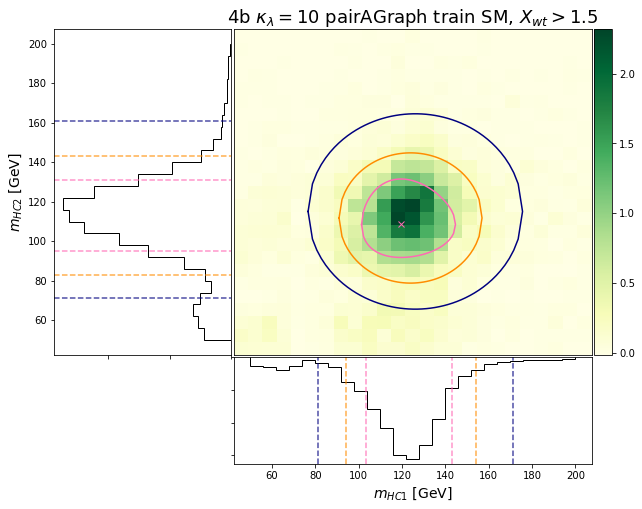

m_h1 =  129.24032303868037 m_h2 =  109.33885045349666
SR center: (120.0,110.0) GeV


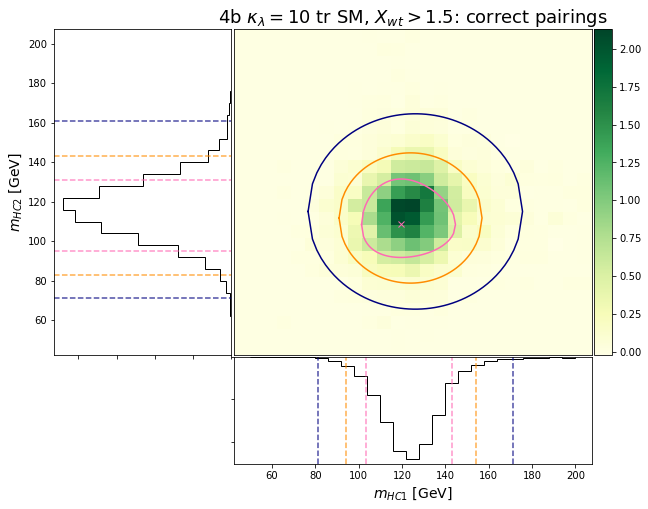

m_h1 =  124.98299980084666 m_h2 =  116.24855140619319
SR center: (120.0,110.0) GeV


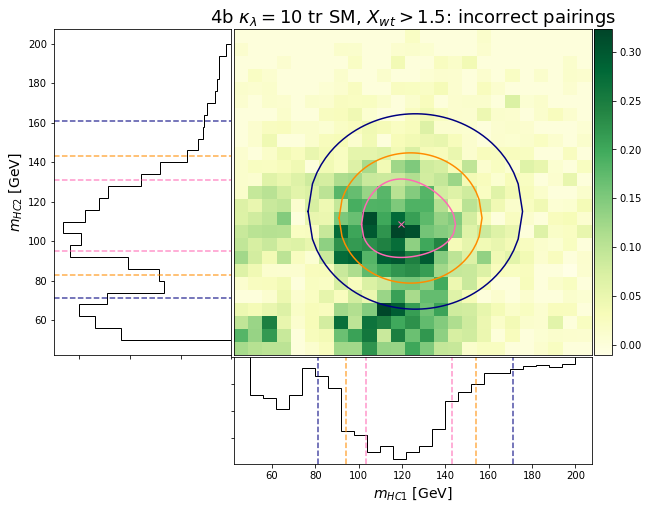

m_h1 =  134.86763567927937 m_h2 =  100.20563567470687


In [50]:
mask = (k_sm.cut_deta_hh)&(k_sm.cut_Xwt)&(k_sm.ntag >=4)
kwargs['weights'] = k_sm.loc[mask,'mc_sf']
kwargs['title'] = '4b $\kappa_\lambda=10$ pairAGraph train SM, $X_{wt} > 1.5$'
kwargs['filename'] = f'figures/k10_mc16a_PFlow-APR2020-5jets/SM_2b/massplane_4b_postXwt.pdf' 

fig = massplane(k_sm[mask],**kwargs)
print('m_h1 = ',np.sum(k_sm.loc[mask,'m_h1']*k_sm.loc[mask,'mc_sf'])/np.sum(k_sm.loc[mask,'mc_sf']),
      'm_h2 = ',np.sum(k_sm.loc[mask,'m_h2']*k_sm.loc[mask,'mc_sf'])/np.sum(k_sm.loc[mask,'mc_sf']))

# incorrect pairings
kwargs['title'] = '4b $\kappa_\lambda=10$ tr SM, $X_{wt} > 1.5$: correct pairings'
kwargs['filename'] = f'figures/k10_mc16a_PFlow-APR2020-5jets/SM_2b/massplane_4b_postXwt_correct.pdf'
kwargs['weights'] = k_sm.loc[mask & (k_sm.predPair==k_sm.correctPair),'mc_sf']
fig = massplane(k_sm[mask & (k_sm.predPair==k_sm.correctPair)],**kwargs)
print('m_h1 = ',np.sum(k_sm.loc[mask & (k_sm.predPair==k_sm.correctPair),'m_h1']*k_sm.loc[mask & (k_sm.predPair==k_sm.correctPair),'mc_sf'])/np.sum(k_sm.loc[mask & (k_sm.predPair==k_sm.correctPair),'mc_sf']),
      'm_h2 = ',np.sum(k_sm.loc[mask & (k_sm.predPair==k_sm.correctPair),'m_h2']*k_sm.loc[mask & (k_sm.predPair==k_sm.correctPair),'mc_sf'])/np.sum(k_sm.loc[mask & (k_sm.predPair==k_sm.correctPair),'mc_sf']))

# correct pairings
kwargs['title'] = '4b $\kappa_\lambda=10$ tr SM, $X_{wt} > 1.5$: incorrect pairings'
kwargs['filename'] = f'figures/k10_mc16a_PFlow-APR2020-5jets/SM_2b/massplane_4b_postXwt_incorrect.pdf'
kwargs['weights'] = k_sm.loc[mask & (k_sm.predPair!=k_sm.correctPair),'mc_sf']
fig = massplane(k_sm[mask & (k_sm.predPair!=k_sm.correctPair)],**kwargs)

print('m_h1 = ',np.sum(k_sm.loc[mask & (k_sm.predPair!=k_sm.correctPair),'m_h1']*k_sm.loc[mask & (k_sm.predPair!=k_sm.correctPair),'mc_sf'])/np.sum(k_sm.loc[mask & (k_sm.predPair!=k_sm.correctPair),'mc_sf']),
      'm_h2 = ',np.sum(k_sm.loc[mask & (k_sm.predPair!=k_sm.correctPair),'m_h2']*k_sm.loc[mask & (k_sm.predPair!=k_sm.correctPair),'mc_sf'])/np.sum(k_sm.loc[mask & (k_sm.predPair!=k_sm.correctPair),'mc_sf']))



Ooooooh - this is kind of interesting!!